In [1]:
import lib

In [2]:
X_val, y_val, X_test, y_test = lib.load_dataset("../dataset")

In [3]:
import cv2
import numpy as np

from sklearn.cluster import KMeans

# We train a KMeans to identify two groups of pixels:
# - The "black pixels"
# - The "white pixels"
# This is much more efficient than using a binary filter
def train_kmeans(X):
    length, h, w = X.shape[:3]
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X.reshape(length*h*w, 3))
    return kmeans

def cluster(kmeans, img):
    h, w = img.shape[:2]
    labels = kmeans.predict(img.reshape(h*w, 3))
    return labels.reshape(h, w)

In [4]:
# Limit kmeans training to 200 images to avoid too much memory consumption
kmeans = train_kmeans(X_val[:200])

In [5]:
import matplotlib.pyplot as plt

for img in X_val[300:303]:
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(cluster(kmeans, img))

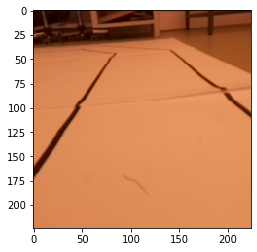

In [6]:
plt.imshow( X_val[200])

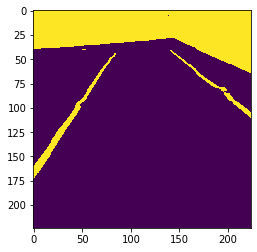

In [7]:
plt.imshow(cluster(kmeans, X_val[200]))

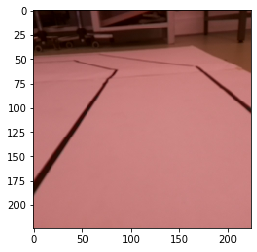

In [8]:
plt.imshow(X_val[400])

In [9]:
def plot_remove_clusters(images, kmeans, columns, max_size):
    count = len(images)

    plt.figure(figsize=(4 * columns, 4 * count/columns))

    for i in range(count):
        image = images[i]
        image = lib.remove_clusters(cluster(kmeans, image), max_size)
        plt.subplot(count / columns + 1, columns, i + 1)
        plt.imshow(image)

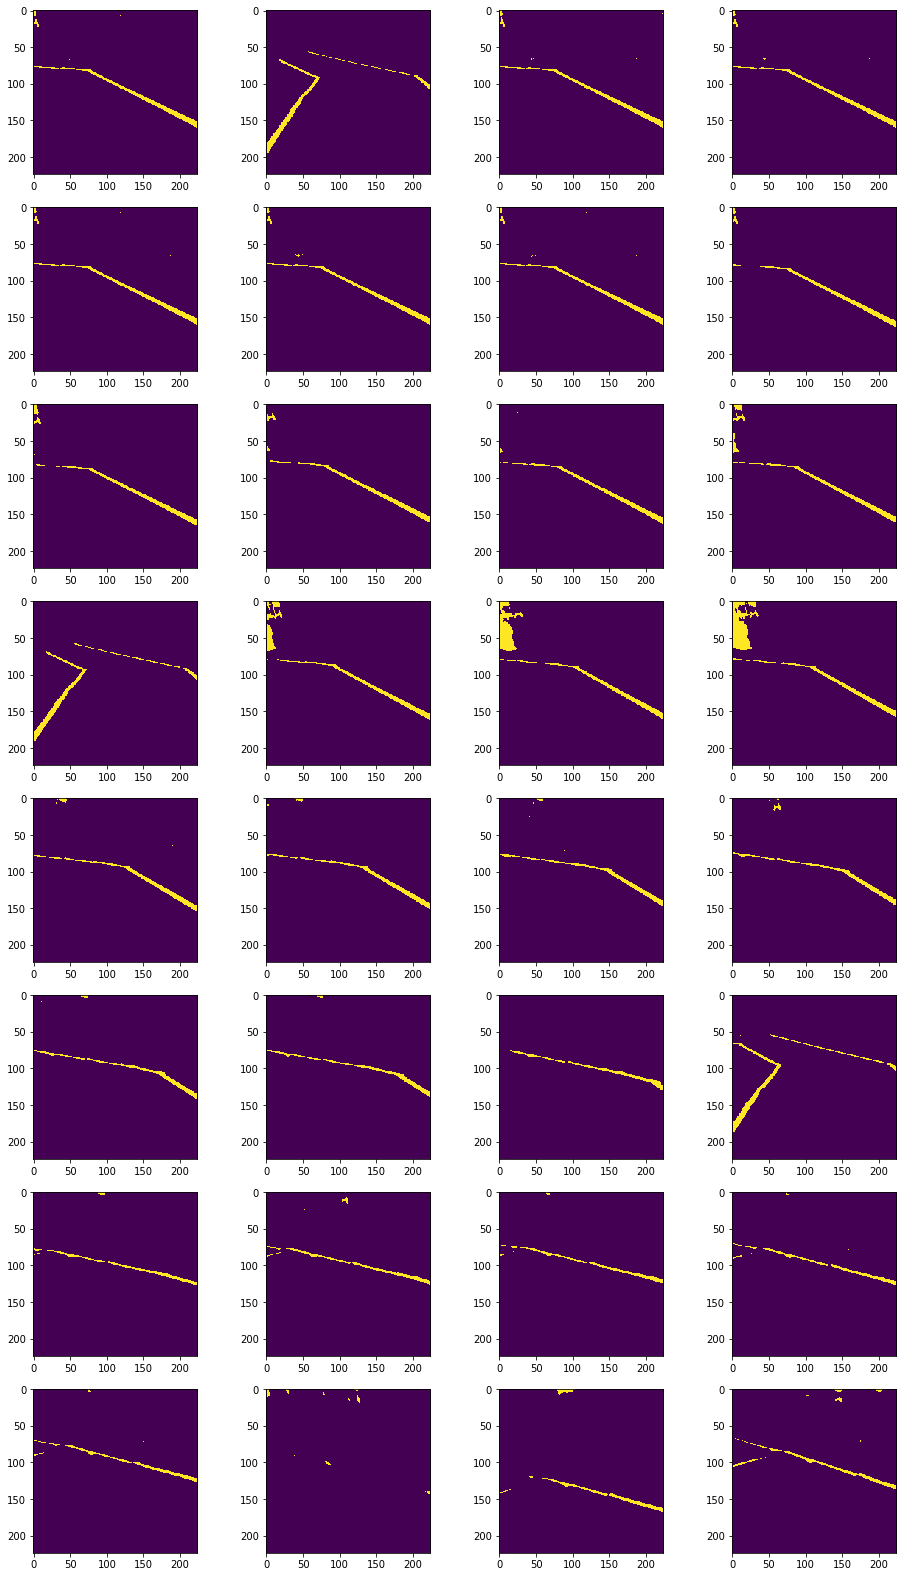

In [10]:
offset = 600
count = 32
plot_remove_clusters(X_val[offset:offset+count], kmeans, 4, 2000)

In [9]:
class PixelClustersEstimator(lib.Estimator):
    def __init__(self, kmeans, limit=2000):
        self.kmeans = kmeans
        self.limit = limit
            
    def predict_one(self, img):
        img = lib.remove_clusters(cluster(self.kmeans, img), self.limit)

        lines = lib.detect_lines(img.astype(np.uint8))
        
        return lib.angle_from_lines(lines, False)

In [10]:
estimator = PixelClustersEstimator(kmeans)

In [ ]:
estimator.score(X_val[300:350], y_val[300:350])

In [ ]:
def draw(img, kmeans, max_size=2000):
    res = lib.remove_clusters(cluster(kmeans, img), max_size)
    
    lines = lib.detect_lines(res.astype(np.uint8))
    
    plt.imshow(lib.draw_lines(res, lines))

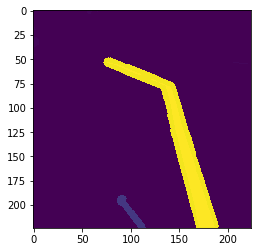

In [25]:
import math
draw(X_val[520], kmeans)